#### Required Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

#### Importing required packages for visualization

In [2]:
from IPython.display import Image  
import pydotplus
import graphviz  
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from scipy.stats import zscore
%matplotlib inline

#### Set random seed value

In [3]:
random_seed = 42

#### Read the file

In [4]:
data = pd.read_csv('US_Heart_Patients.csv')

### First 10 rows of the data

In [5]:
data.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


#### Information about the column (data types)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


### checking for Possible columns which are categorical

In [7]:
for col in data.columns:
    print(col)
    print(data[col].unique())

Gender
['Male' 'Female' nan]
age
[39. 46. 48. 61. 43. 63. 45. 52. 50. 41. 38. 42. 44. 47. 60. 35. 36. 59.
 54. 37. 56. 53. 49. 65. 51. 62. 40. 67. 57. 66. nan 64. 55. 58. 34. 68.
 33. 70. 32. 69.]
education
[ 4.  2.  1.  3. nan]
currentSmoker
[ 0.  1. nan]
cigsPerDay
[ 0. 20. 30. 23. 15.  9. 10. nan 35. 43.  5.  1. 40.  3.  2. 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
BP Meds
[ 0.  1. nan]
prevalentStroke
[ 0. nan  1.]
prevalentHyp
[ 0.  1. nan]
diabetes
[ 0.  1. nan]
tot cholesterol
[195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332.  nan
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 226. 209. 175. 214.
 257. 178. 233. 180. 243. 237. 311. 208. 252. 261. 179. 194. 267. 216.
 240. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202. 213. 183.
 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269. 275. 268.
 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246. 150. 266.
 187. 286. 154. 279. 293. 259. 219. 230. 320. 312

#### Change the data types of categorical features into obeject data type

In [8]:
cat=["education","currentSmoker","BP Meds","prevalentStroke","prevalentHyp","diabetes"]
for i in cat:
    data[i]=data[i].astype("object")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


#### Making different list for categorical columns and numerical columns

In [9]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


#### 5-point summary

In [10]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.579283,8.572875,32.00,42.00,49.000,56.00,70.0
cigsPerDay,4209.0,9.001901,11.920742,0.00,0.00,0.000,20.00,70.0
tot cholesterol,4180.0,236.677273,44.616098,107.00,206.00,234.000,263.00,696.0
Systolic BP,4236.0,132.362370,22.039244,83.50,117.00,128.000,144.00,295.0
Diastolic BP,4235.0,82.901889,11.914467,48.00,75.00,82.000,90.00,142.5
BMI,4216.0,25.798916,4.075256,15.54,23.07,25.395,28.04,56.8
heartRate,4236.0,75.867800,11.999488,44.00,68.00,75.000,83.00,143.0
glucose,3849.0,81.951936,23.958428,40.00,71.00,78.000,87.00,394.0
Heart-Att,4240.0,0.151887,0.358953,0.00,0.00,0.000,0.00,1.0


In [11]:
data[cat].describe().T

,count,unique,top,freq
Gender,4232,2,Female,2414
education,4130.0,4.0,1.0,1717.0
currentSmoker,4237.0,2.0,0.0,2143.0
BP Meds,4180.0,2.0,0.0,4056.0
prevalentStroke,4231.0,2.0,0.0,4206.0
prevalentHyp,4238.0,2.0,0.0,2922.0
diabetes,4238.0,2.0,0.0,4129.0


#### Any missing value

In [12]:
print(data.isnull().sum())

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64


#### Imputation of all missing values with the bext possible option

In [13]:
for column in cat:
    data[column].fillna(data[column].mode()[0], inplace=True)
    data[column] = data[column].astype("object")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   object 
 1   age              4238 non-null   float64
 2   education        4240 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4240 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


#### Check the outliers for numerical values

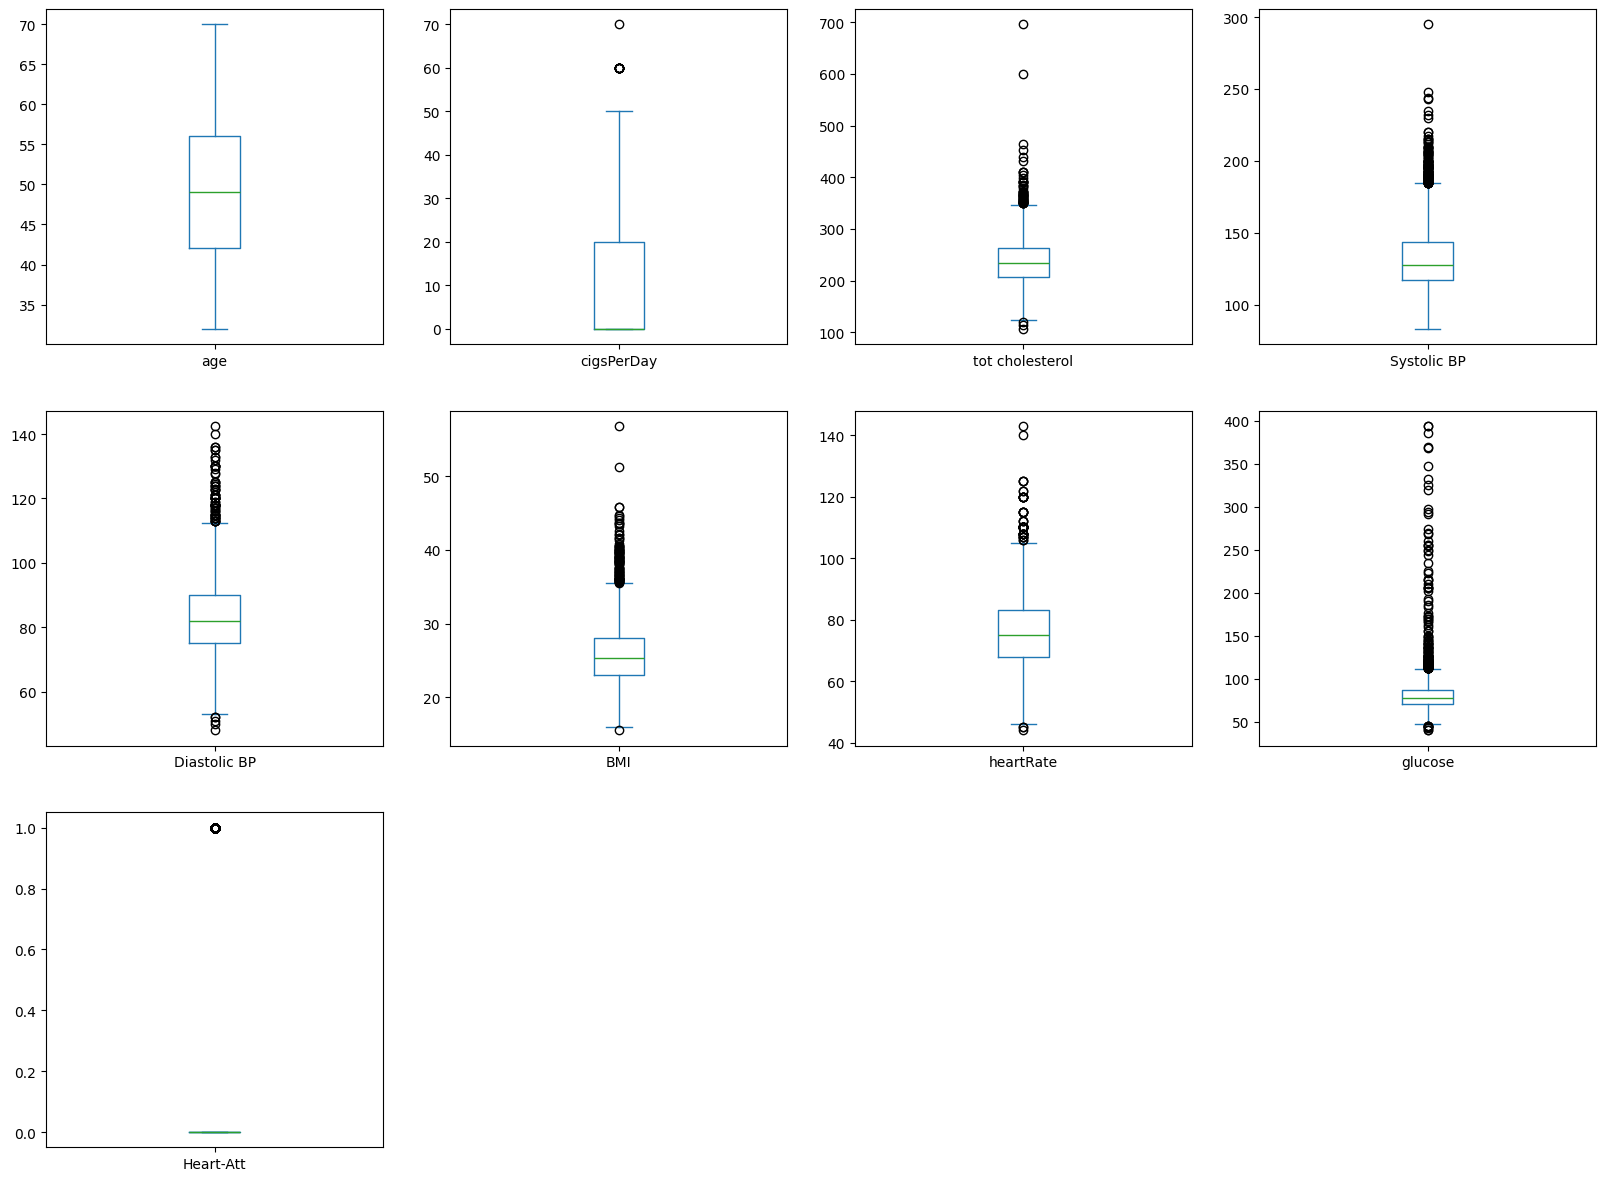

In [15]:
data[num].plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))
plt.show()

Therebare outlairs in some features. But no possible outliers are present here in "age", we will use mean to impute null values in "age" column.

In [16]:
data.age=data.age.fillna(data.age.mean())

All other variables have possible ouliers and hence median would be used for imputaiton.

In [17]:
impute=['cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']
for i in impute:
    data[i].fillna(data[i].median(),inplace=True)

In [18]:
data.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

#### Distribution of the numerical data

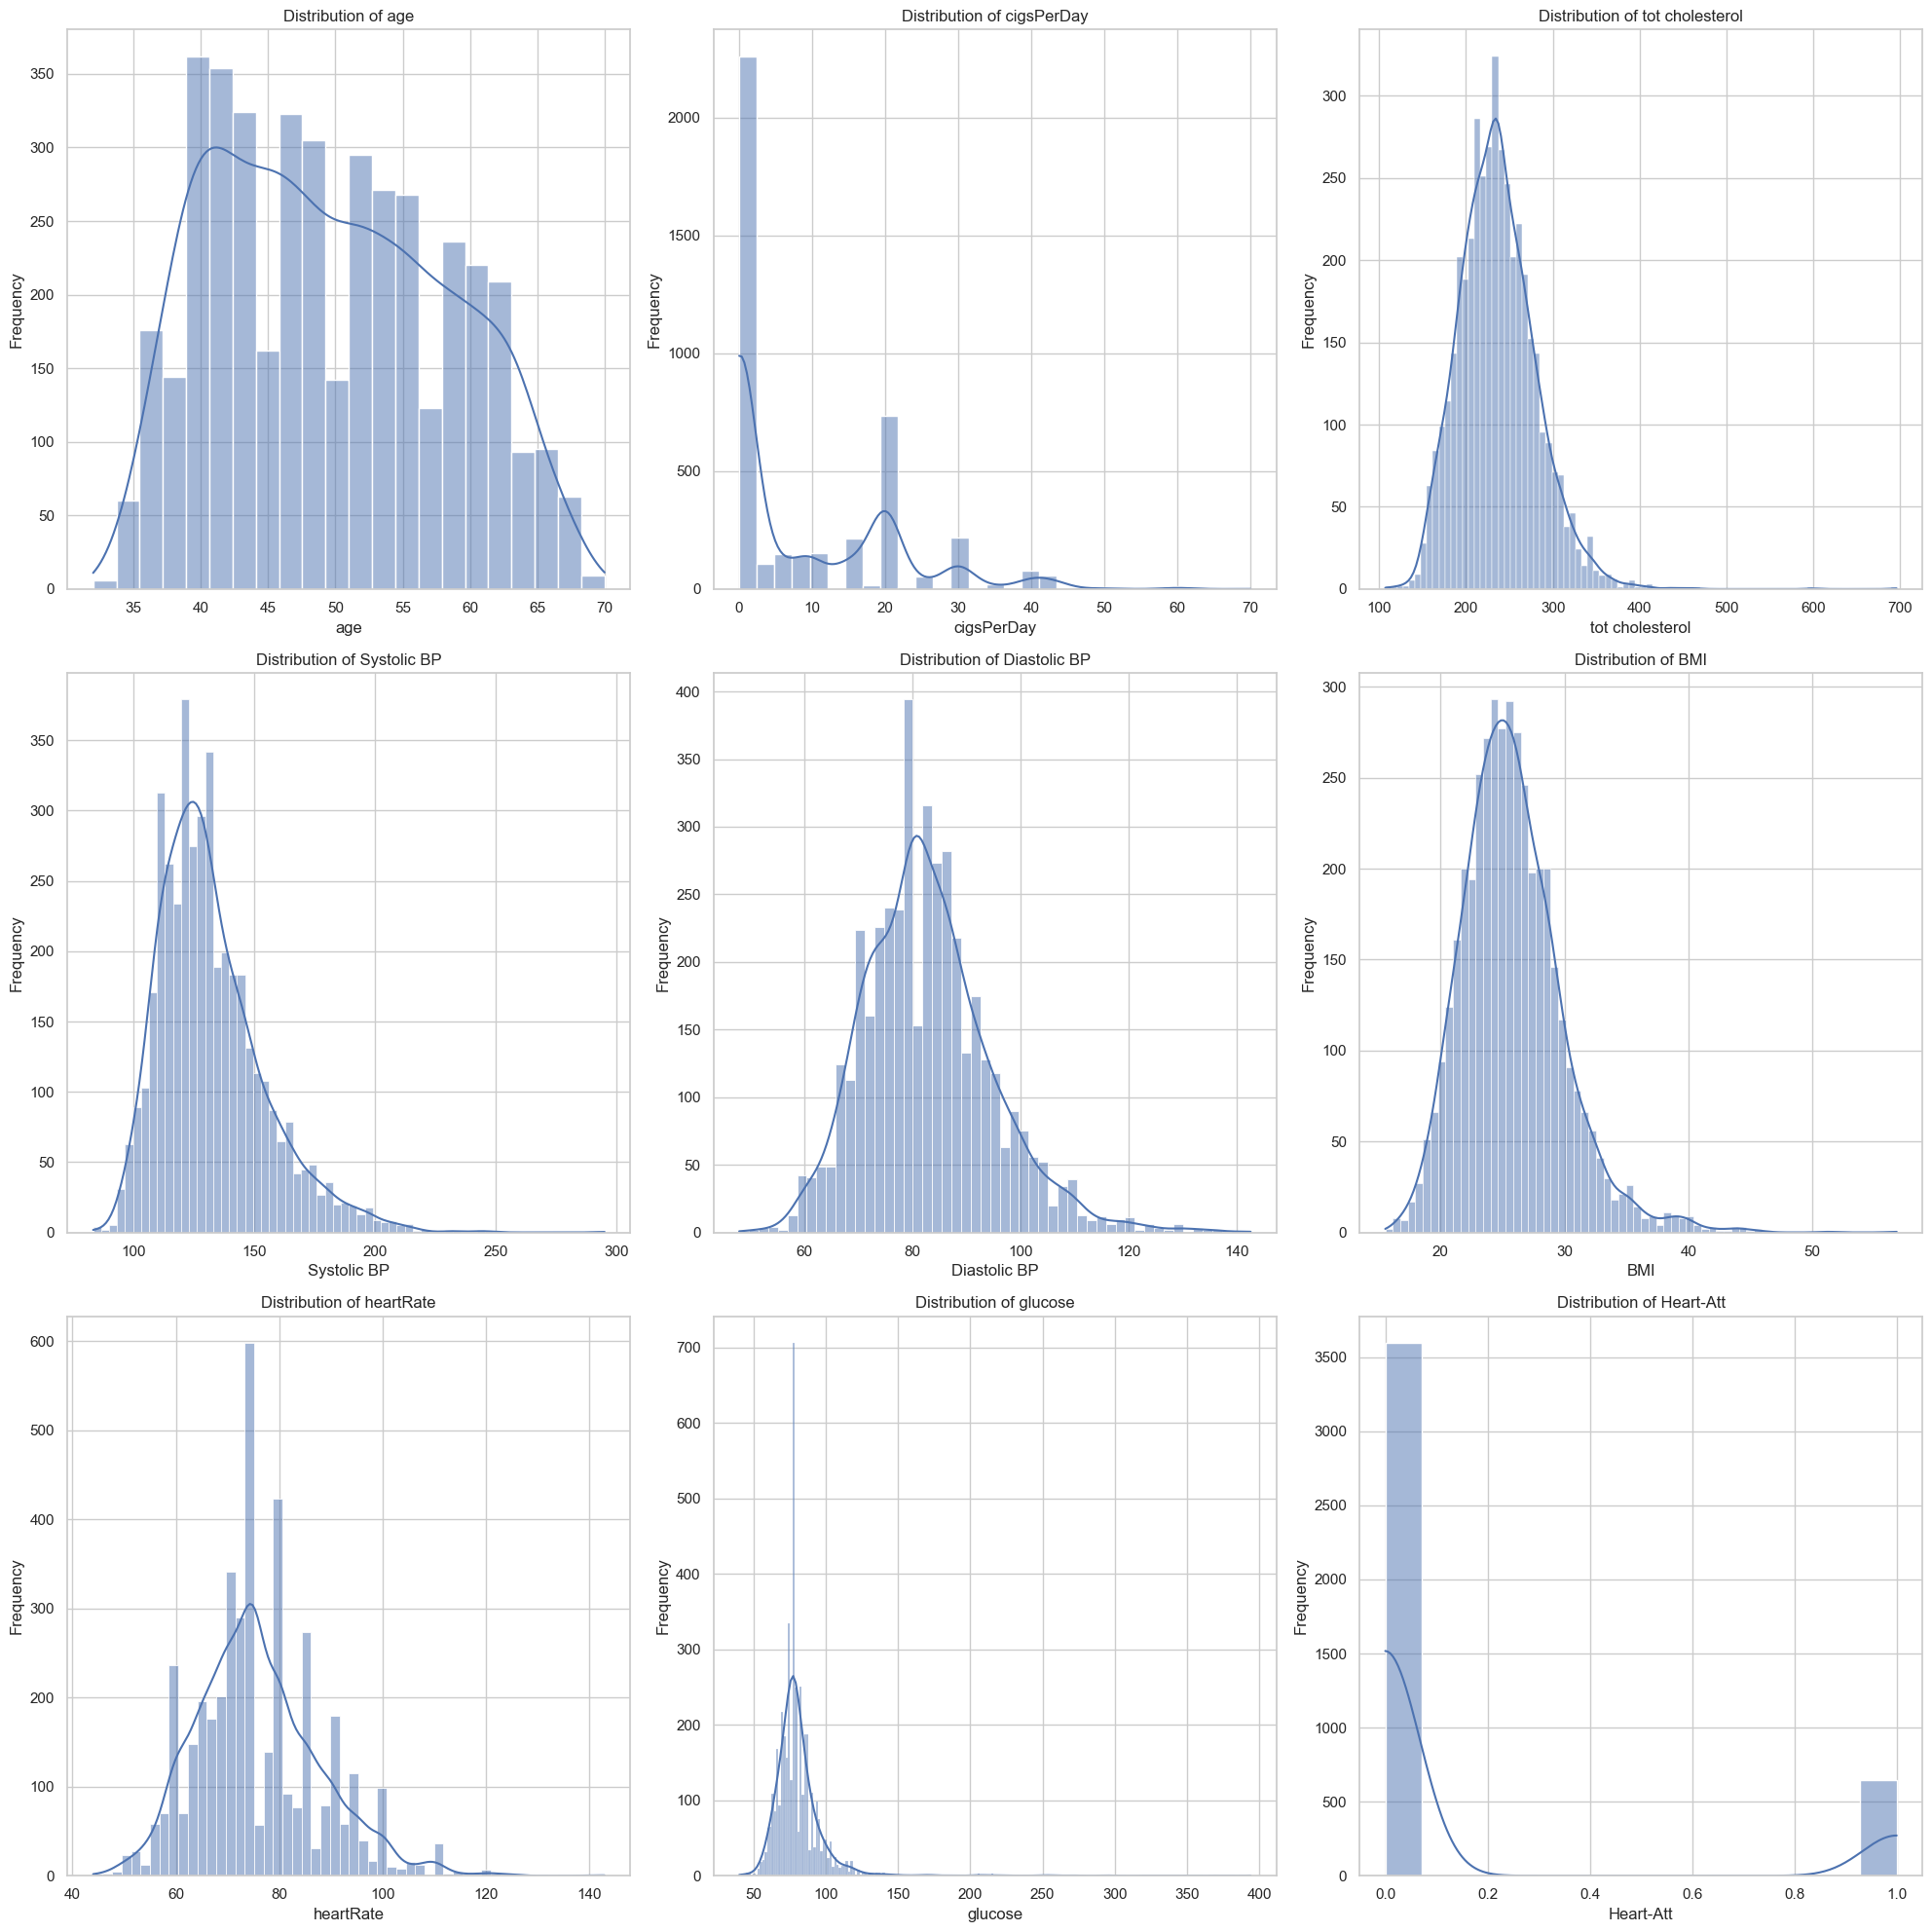

In [19]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()
# Plot the distribution of each numerical column
for i, col in enumerate(num):
    sns.histplot(data[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### Correlation between variables

In [20]:
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix.head(10)

,age,cigsPerDay,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
age,1.000000,-0.191270,0.260539,0.394082,0.205344,0.134307,-0.011322,0.117122,0.226012
cigsPerDay,-0.191270,1.000000,-0.026874,-0.088819,-0.057214,-0.092723,0.072906,-0.056206,0.059038
tot cholesterol,0.260539,-0.026874,1.000000,0.207234,0.162610,0.114801,0.090748,0.045698,0.081745
Systolic BP,0.394082,-0.088819,0.207234,1.000000,0.783860,0.324609,0.183298,0.134726,0.216343
Diastolic BP,0.205344,-0.057214,0.162610,0.783860,1.000000,0.375706,0.181580,0.058229,0.144597
BMI,0.134307,-0.092723,0.114801,0.324609,0.375706,1.000000,0.068135,0.081519,0.072591
heartRate,-0.011322,0.072906,0.090748,0.183298,0.181580,0.068135,1.000000,0.086941,0.023872
glucose,0.117122,-0.056206,0.045698,0.134726,0.058229,0.081519,0.086941,1.000000,0.120156
Heart-Att,0.226012,0.059038,0.081745,0.216343,0.144597,0.072591,0.023872,0.120156,1.000000


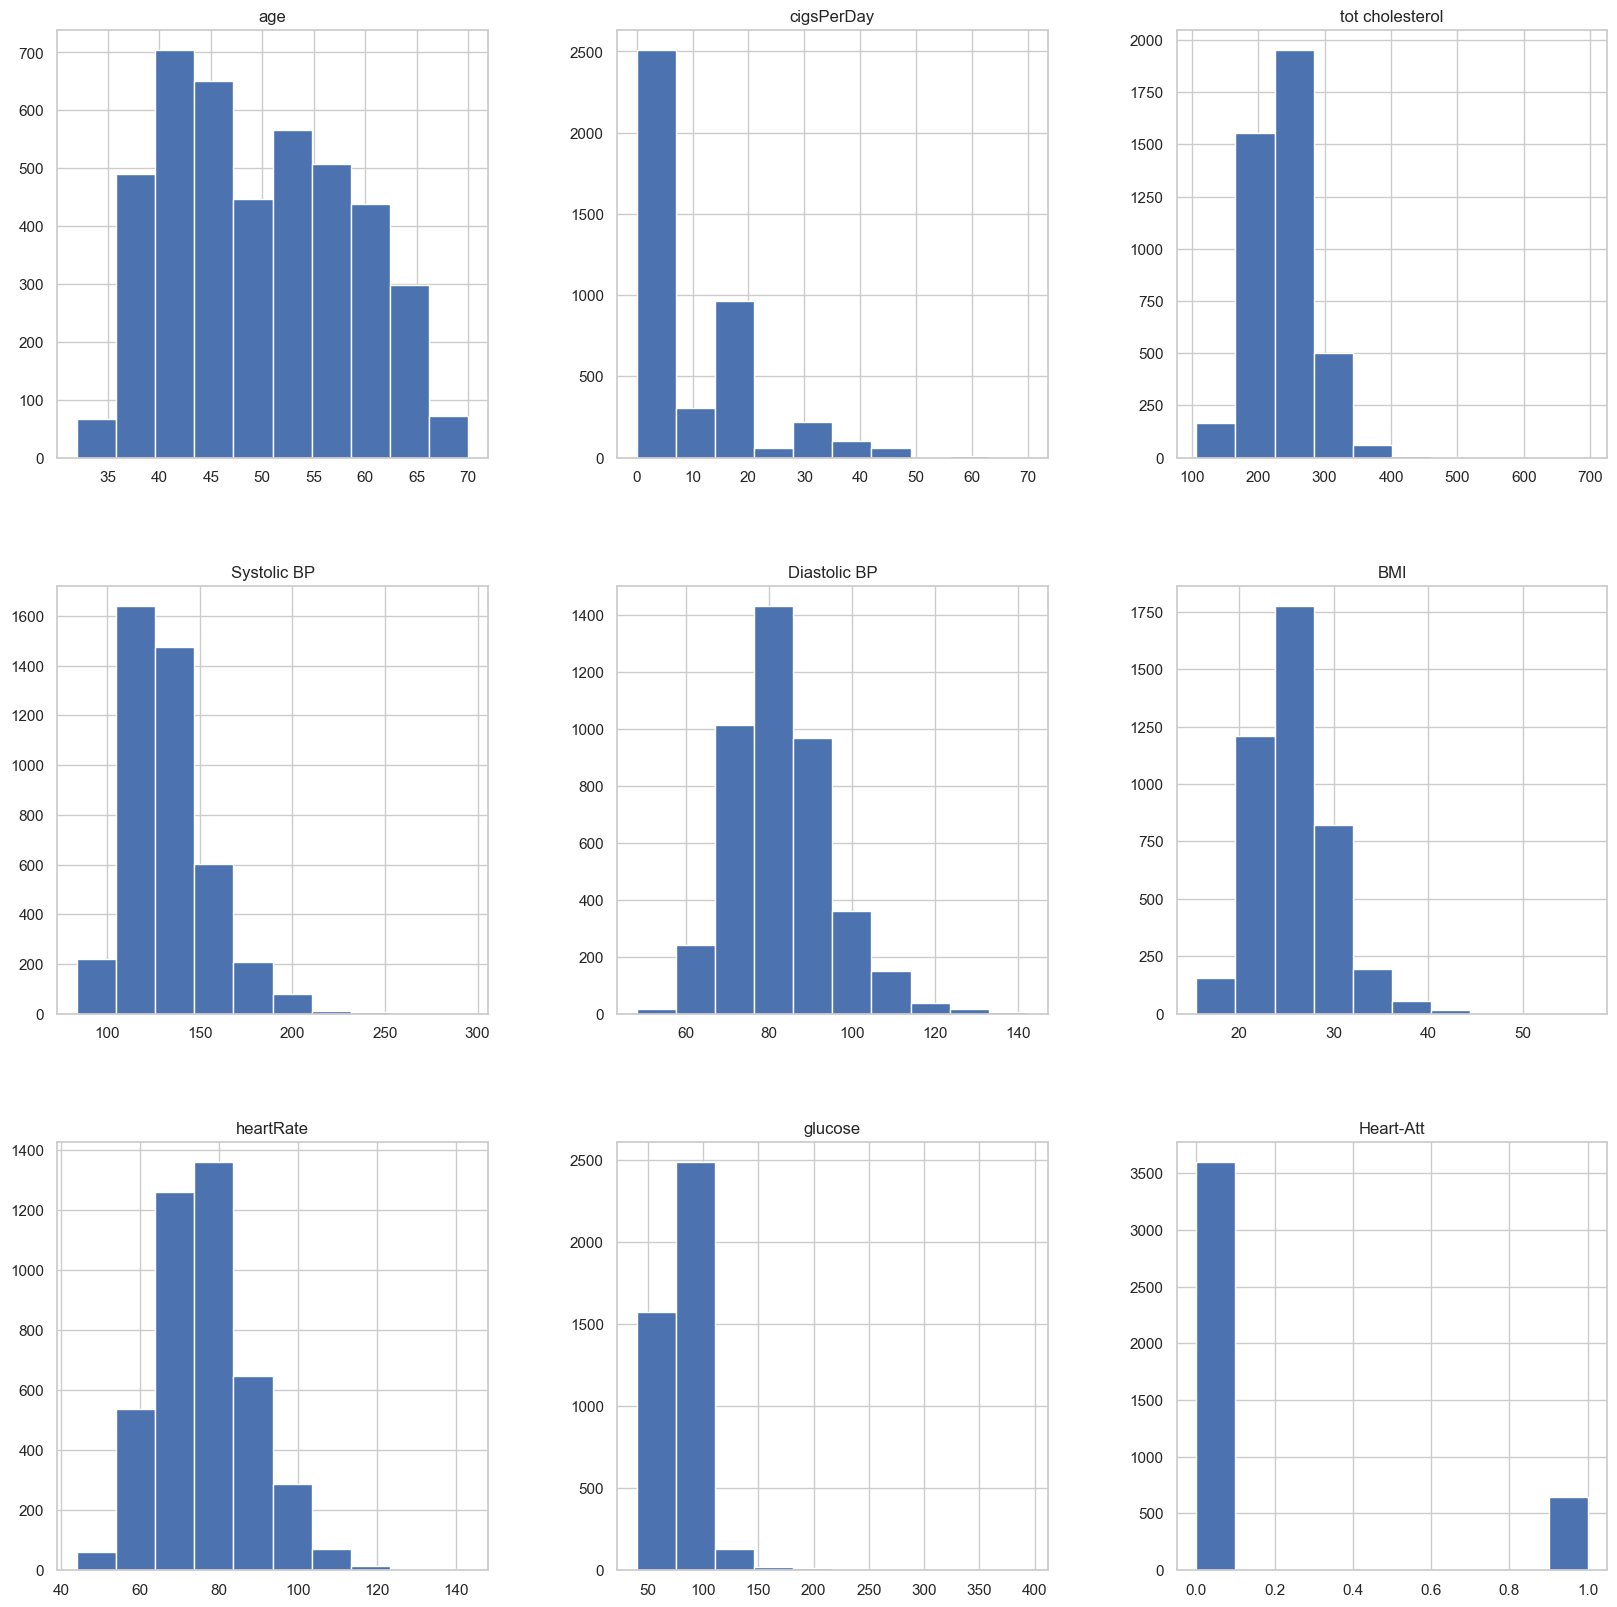

In [21]:
data.hist(figsize=(20, 20))
plt.show()

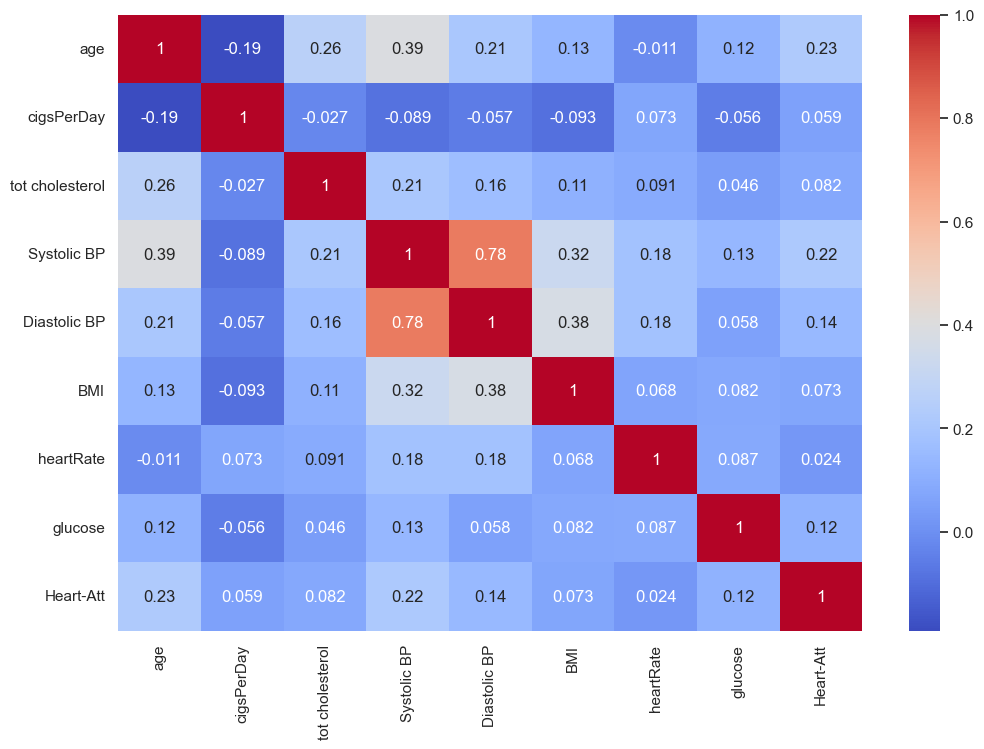

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Systolic BP and Diastolic BP are highly correlated. One of them would be dropped.

In [23]:
# Dropping Systolic BP
data.drop(['Systolic BP'], axis = 1,inplace=True)

#### Encoding Gender

In [24]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Gender'] = data['Gender'].astype(object)
data.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,70.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,81.0,28.73,95.0,76.0,0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,80.0,25.34,75.0,70.0,0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,95.0,28.58,65.0,103.0,1
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,84.0,23.10,85.0,85.0,0
5,0,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,110.0,30.30,77.0,99.0,0
6,0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,71.0,33.11,60.0,85.0,1
7,0,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,71.0,21.68,79.0,78.0,0
8,1,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,89.0,26.36,76.0,79.0,0
9,1,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,107.0,23.61,93.0,88.0,0


#### outlier treatment

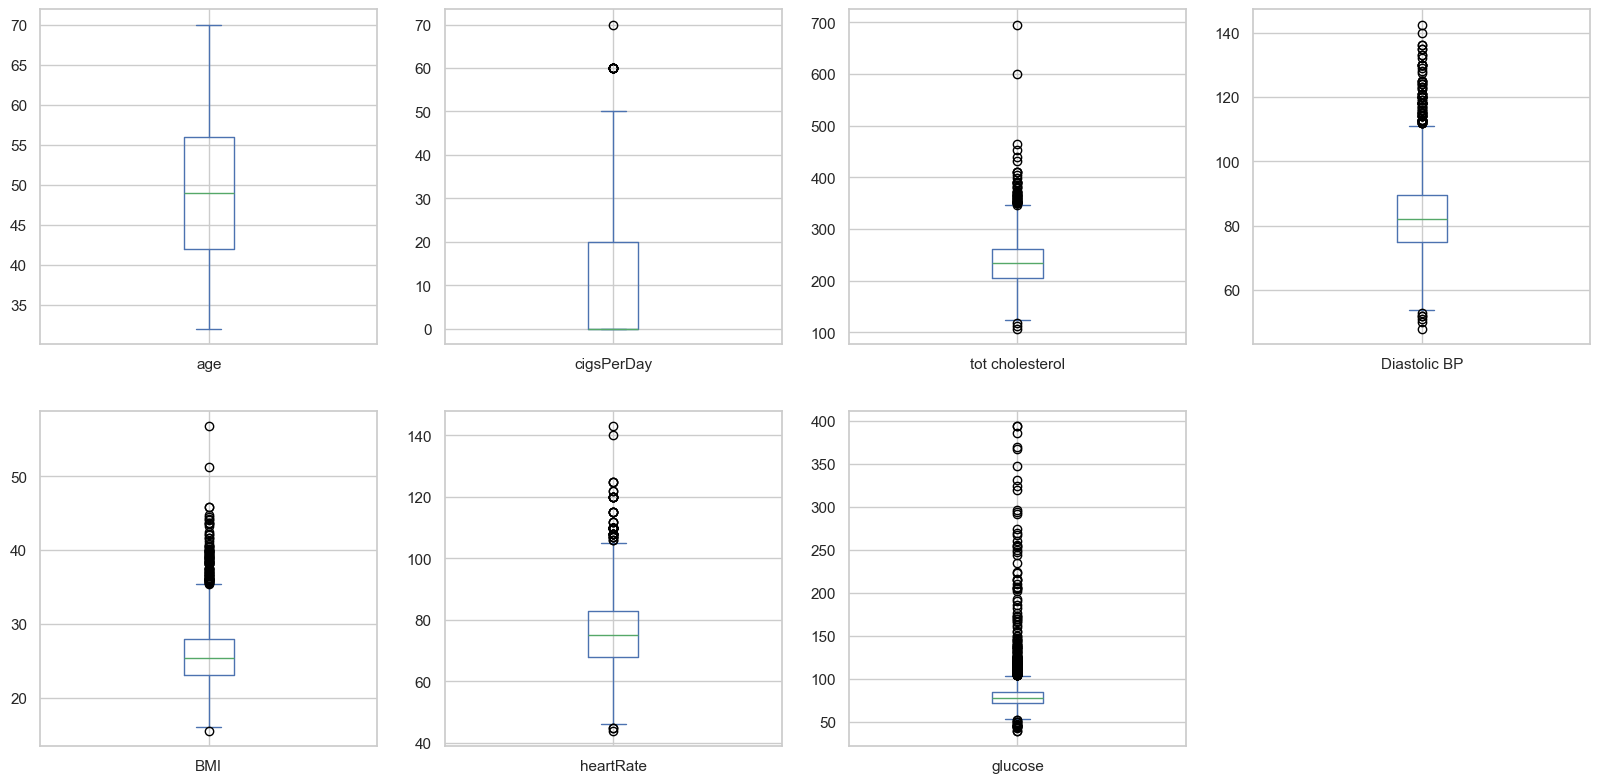

In [25]:
data.iloc[:,lambda data: [1,4,9,10,11,12,13]].plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))
plt.show()

Except for age, all other continuous variables have possible outliers

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [27]:
for column in data.iloc[:,lambda data: [1,4,9,10,11,12,13]].columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

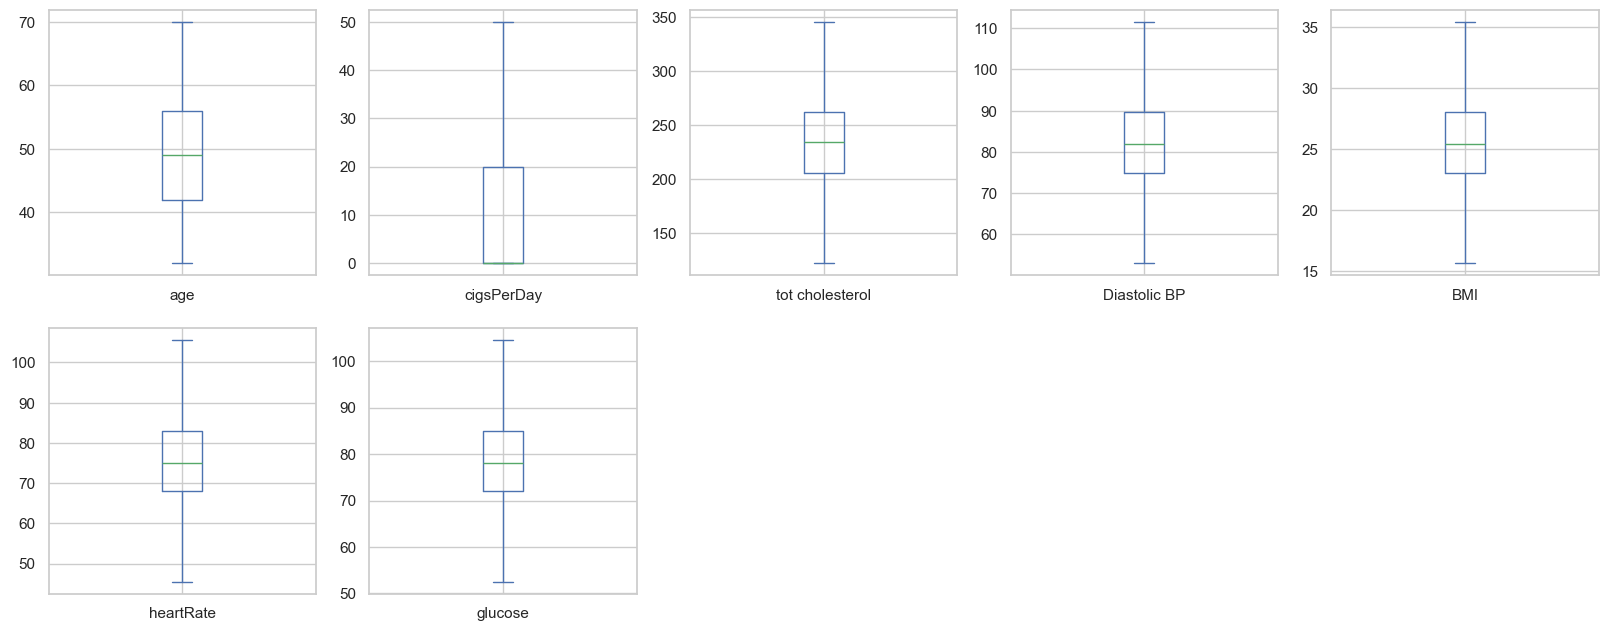

In [28]:
data.iloc[:,lambda data: [1,4,9,10,11,12,13]].plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20))
plt.show()

#### Preparing Data sets

In [29]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'tot cholesterol', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


In [30]:
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,70.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,81.0,28.73,95.0,76.0,0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,80.0,25.34,75.0,70.0,0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,95.0,28.58,65.0,103.0,1
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,84.0,23.10,85.0,85.0,0


In [31]:
X = data.drop('Heart-Att', axis=1) 
y = data['Heart-Att']

In [32]:
X.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Diastolic BP,BMI,heartRate,glucose
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,70.0,26.97,80.0,77.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,81.0,28.73,95.0,76.0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,80.0,25.34,75.0,70.0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,95.0,28.58,65.0,103.0
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,84.0,23.10,85.0,85.0


In [33]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Heart-Att, dtype: int64

#### Spliting the data into 80% training dataset and 20% test dataset

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

### Decision Tree

Function to create label for Decision Tree

In [35]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Healthy', "Heart Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [36]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [37]:
dt = DecisionTreeClassifier(random_state=42)

#### Creating Hyperparameter

In [38]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [39]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [40]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 469 ms
Wall time: 6.02 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [41]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035252,0.004266,0.007002,0.002351,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.816038,0.807783,0.803066,0.800708,0.806899,0.005859,26
1,0.030661,0.004120,0.006136,0.001432,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.827830,0.808962,0.810142,0.831368,0.819575,0.010110,20
2,0.025505,0.001117,0.007140,0.002357,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.831368,0.839623,0.831368,0.836085,0.834611,0.003476,13
3,0.023155,0.002952,0.005755,0.000424,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.838443,0.837264,0.840802,0.845519,0.840507,0.003161,7
4,0.021252,0.004204,0.008944,0.002419,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.846698,0.846698,0.846698,0.845519,0.846403,0.000511,1


In [42]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
4,0.021252,0.004204,0.008944,0.002419,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.846698,0.846698,0.846698,0.845519,0.846403,0.000511,1
9,0.019148,0.002864,0.006999,0.003466,gini,15,100,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.846698,0.846698,0.846698,0.845519,0.846403,0.000511,1
14,0.019750,0.003269,0.005999,0.002345,gini,20,100,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.846698,0.846698,0.846698,0.845519,0.846403,0.000511,1
19,0.022007,0.001876,0.006999,0.001222,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.846698,0.846698,0.846698,0.845519,0.846403,0.000511,1
24,0.026761,0.013776,0.006751,0.002483,entropy,15,100,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.846698,0.846698,0.846698,0.845519,0.846403,0.000511,1


In [43]:
dt_best = grid_search.best_estimator_
evaluate_model(dt_best)

Train Accuracy : 0.8466981132075472
Train Confusion Matrix:
[[2818   53]
 [ 467   54]]
--------------------------------------------------
Test Accuracy : 0.8502358490566038
Test Confusion Matrix:
[[715  10]
 [117   6]]


In [44]:
print('--------- Train Data ------------')
print(classification_report(y_train, dt_best.predict(X_train)))

--------- Train Data ------------
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2871
           1       0.50      0.10      0.17       521

    accuracy                           0.85      3392
   macro avg       0.68      0.54      0.54      3392
weighted avg       0.80      0.85      0.80      3392



In [45]:
print('--------- Test Data ------------')
print(classification_report(y_test, dt_best.predict(X_test)))

--------- Test Data ------------
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.38      0.05      0.09       123

    accuracy                           0.85       848
   macro avg       0.62      0.52      0.50       848
weighted avg       0.79      0.85      0.80       848



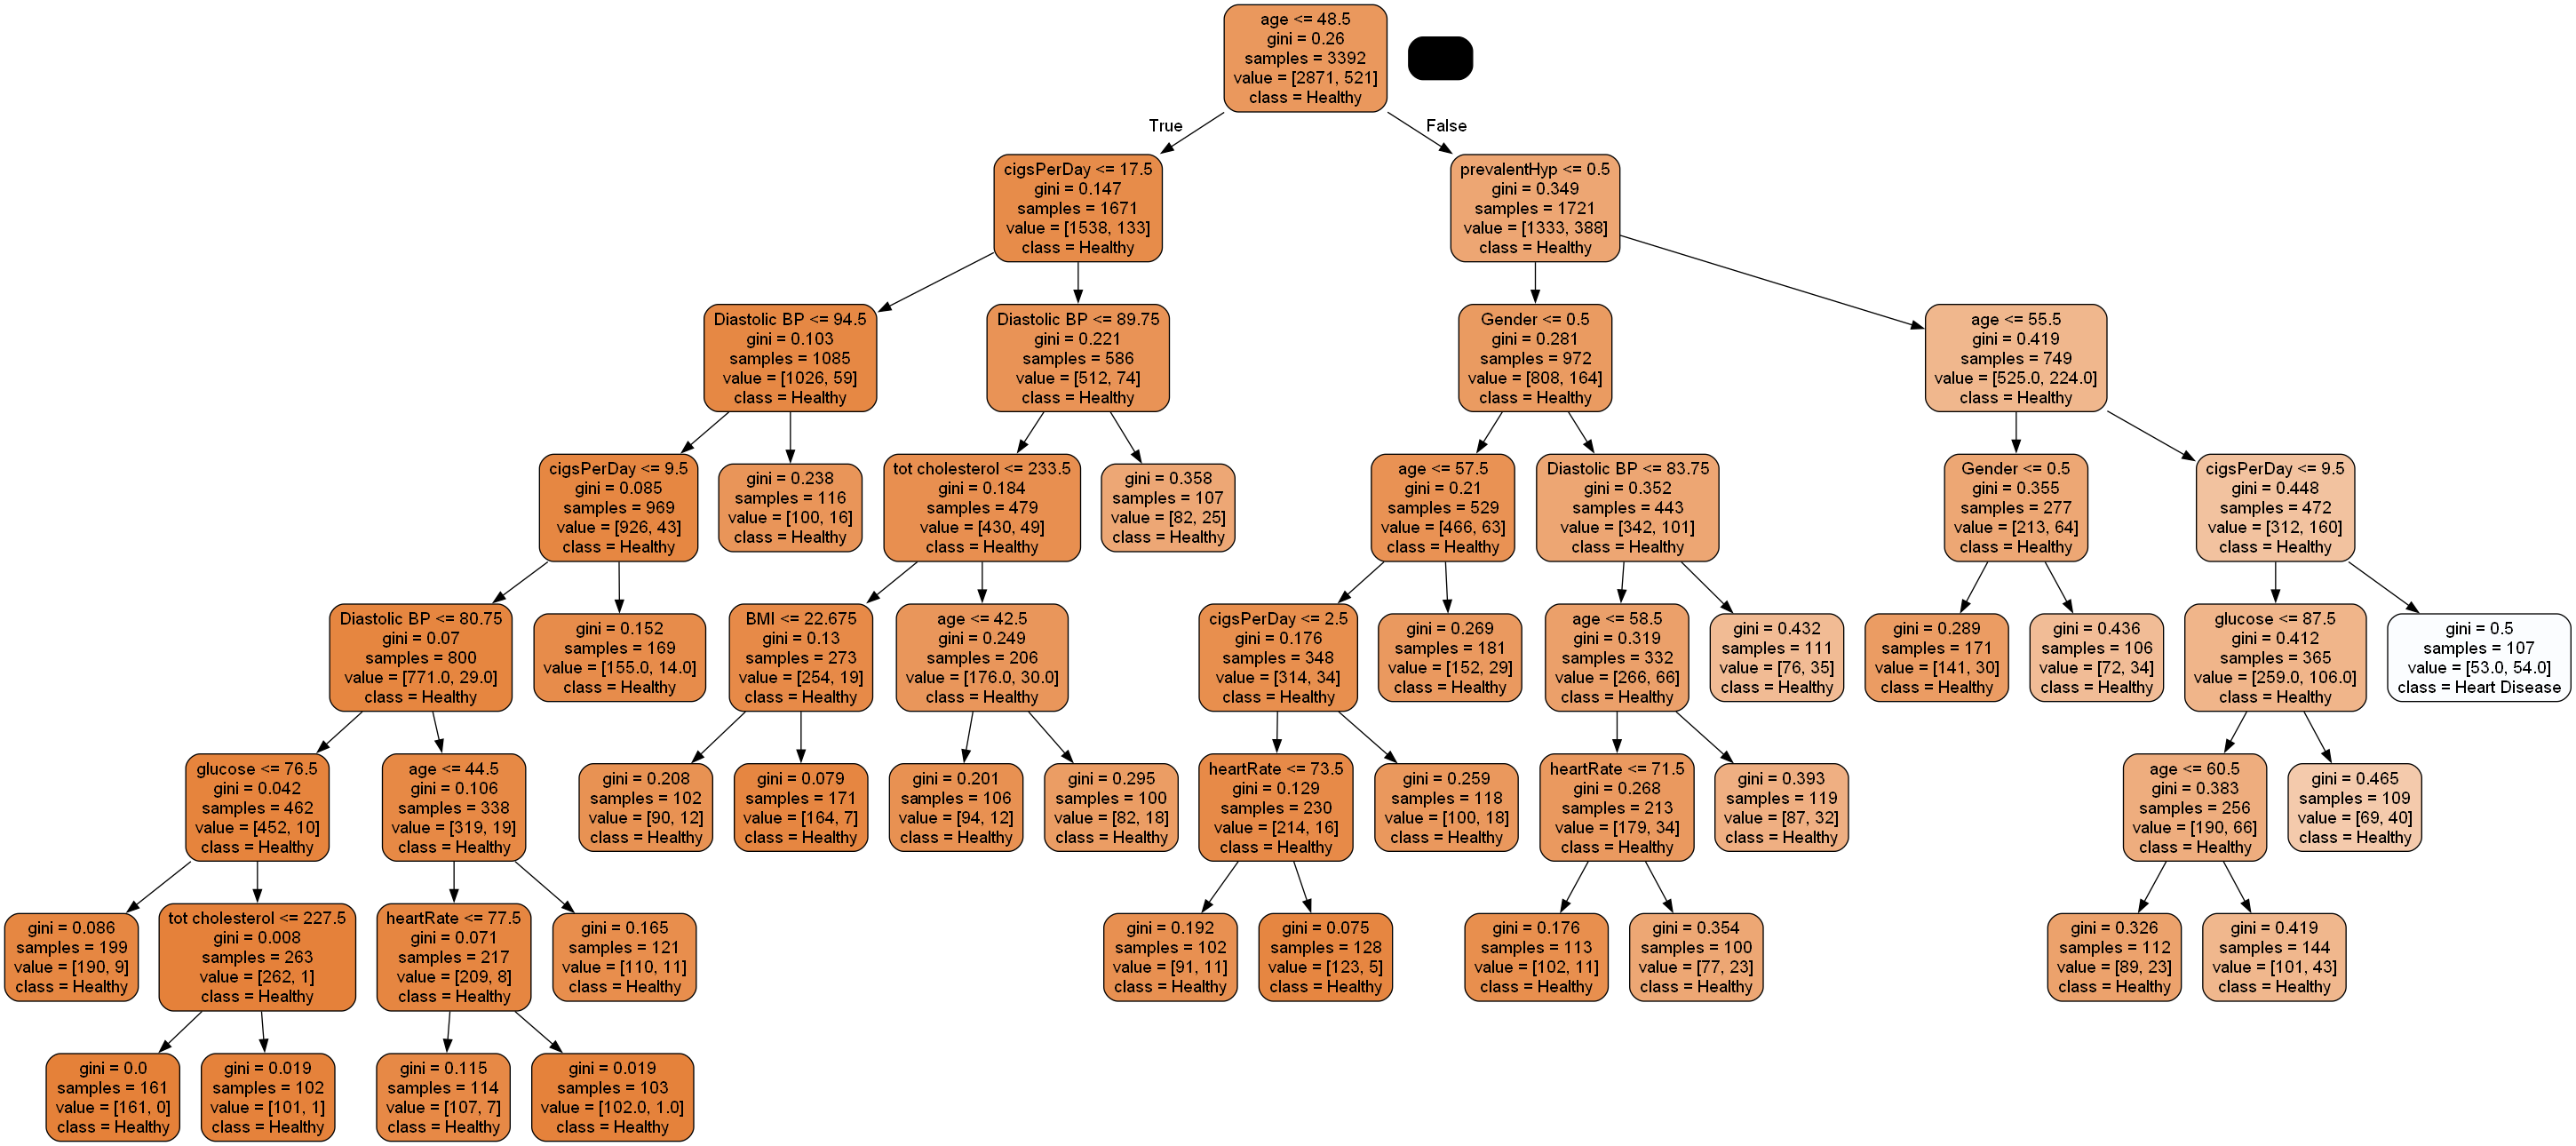

In [46]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

### Naive Bayes Model

In [47]:
gnb = GaussianNB()

In [48]:
params = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1.0]
}

In [49]:
grid_search = GridSearchCV(estimator=gnb, param_grid=params, cv=4, scoring='accuracy')

In [50]:
%%time
grid_search.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 342 ms


GridSearchCV(cv=4, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1.0]},
             scoring='accuracy')

In [51]:
best_gnb = grid_search.best_estimator_

In [52]:
score_gnb = pd.DataFrame(grid_search.cv_results_)
score_gnb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007654,0.001727,0.003997,0.001001,1.000000e-09,{'var_smoothing': 1e-09},0.834906,0.823113,0.830189,0.821934,0.827535,0.005298,6
1,0.004275,0.000473,0.001979,0.000043,1.000000e-08,{'var_smoothing': 1e-08},0.834906,0.823113,0.830189,0.821934,0.827535,0.005298,6
2,0.004242,0.000427,0.003027,0.000703,1.000000e-07,{'var_smoothing': 1e-07},0.836085,0.823113,0.829009,0.821934,0.827535,0.005617,6
3,0.004007,0.000012,0.002671,0.000408,1.000000e-06,{'var_smoothing': 1e-06},0.834906,0.821934,0.827830,0.821934,0.826651,0.005339,9
4,0.005222,0.001099,0.003273,0.000420,1.000000e-05,{'var_smoothing': 1e-05},0.831368,0.818396,0.821934,0.825472,0.824292,0.004790,10


In [53]:
score_gnb.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
7,0.004190,0.000421,0.002315,0.000863,0.0100,{'var_smoothing': 0.01},0.844340,0.847877,0.841981,0.852594,0.846698,0.003999,1
8,0.005033,0.001859,0.003969,0.001215,0.1000,{'var_smoothing': 0.1},0.846698,0.846698,0.846698,0.845519,0.846403,0.000511,2
9,0.007264,0.001926,0.003417,0.000559,1.0000,{'var_smoothing': 1.0},0.846698,0.846698,0.846698,0.845519,0.846403,0.000511,2
6,0.003749,0.000433,0.002440,0.000425,0.0010,{'var_smoothing': 0.001},0.840802,0.830189,0.836085,0.852594,0.839917,0.008228,4
5,0.003978,0.000040,0.002268,0.000468,0.0001,{'var_smoothing': 0.0001},0.824292,0.826651,0.826651,0.846698,0.831073,0.009072,5


In [54]:
gnb_best = grid_search.best_estimator_
evaluate_model(gnb_best)

Train Accuracy : 0.8487617924528302
Train Confusion Matrix:
[[2835   36]
 [ 477   44]]
--------------------------------------------------
Test Accuracy : 0.8466981132075472
Test Confusion Matrix:
[[715  10]
 [120   3]]


In [55]:
print('--------- Train Data ------------')
print(classification_report(y_train, gnb_best.predict(X_train)))

--------- Train Data ------------
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2871
           1       0.55      0.08      0.15       521

    accuracy                           0.85      3392
   macro avg       0.70      0.54      0.53      3392
weighted avg       0.81      0.85      0.80      3392



In [56]:
print('--------- Test Data ------------')
print(classification_report(y_test, gnb_best.predict(X_test)))

--------- Test Data ------------
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.23      0.02      0.04       123

    accuracy                           0.85       848
   macro avg       0.54      0.51      0.48       848
weighted avg       0.77      0.85      0.79       848



## In this analysis, we evaluate the performance of two machine learning models: Decision Tree Classifier and Gaussian Naive Bayes, on a dataset related to heart patients in the US. The evaluation metrics include precision, recall, F1-score, and accuracy, with a detailed breakdown provided for each model. For this dataset, Class 0 represents patients with a Healthy Heart, and Class 1 represents patients with Heart Disease.

# Decision Tree Classifier
## Classification Report:
|              | precision | recall | f1-score | support |
|--------------|------------|--------|----------|---------|
| Healthy Heart (Class 0) | 0.86      | 0.99   | 0.92     | 725     |
| Heart Disease (Class 1) | 0.38      | 0.05   | 0.09     | 123     |
| **accuracy**            |          |        | 0.85     | 848     |
| **macro avg**           | 0.62      | 0.52   | 0.50     | 848     |
| **weighted avg**        | 0.79      | 0.85   | 0.80     | 848     |

 ## Key Observations:
#
## Healthy Heart (Class 0) Performance:
- **Precision:** 0.86
- **Recall:** 0.99
- **F1-Score:** 0.92
- **Support:** 725

The Decision Tree Classifier performs exceptionally well on identifying patients with a Healthy Heart, achieving high precision, recall, and F1-score. This indicates that the model accurately identifies most healthy patients with few false posi#tives.

## Heart Disease (Class 1) Performance:
- **Precision:** 0.38
- **Recall:** 0.05
- **F1-Score:** 0.09
- **Support:** 123

The performance on identifying patients with Heart Disease is notably poor, with low precision, recall, and F1-score. This indicates that the model struggles to correctly identify patients with heart disease, leading to many fa#lse negatives.

## Overall Performance:
- *#*Accuracy:** 0.85

### Macro Average:
- **Precision:** 0.62
- **Recall:** 0.52#
- **F1-Score:** 0.50

### Weighted Average:
- **Precision:** 0.79
- **Recall:** 0.85
- **F1-Score:** 0.80

The overall accuracy of 85% is largely driven by the model's performance on healthy patients. The macro average metrics reflect the imbalance in performance between the two classes, while the weighted average metrics are more reflective of the dominant class.
   848


# Gaussian Naive Bayes
## Classification Report:
|              | precision | recall | f1-score | support |
|--------------|------------|--------|----------|---------|
| Healthy Heart (Class 0) | 0.86      | 0.99   | 0.92     | 725     |
| Heart Disease (Class 1) | 0.23      | 0.02   | 0.04     | 123     |
| **accuracy**            |          |        | 0.85     | 848     |
| **macro avg**           | 0.54      | 0.51   | 0.48     | 848     |
| **weighted avg**        | 0.77      | 0.85   | 0.79     | 848     |
 ## Key Observations:
#
## Healthy Heart (Class 0) Performance:
- **Precision:** 0.86
- **Recall:** 0.99
- **F1-Score:** 0.92
- **Support:** 725

Similar to the Decision Tree Classifier, the Gaussian Naive Bayes model performs very well on identifying patients with a Healthy Heart, achieving high precision, recall, and F1-s#core.

## Heart Disease (Class 1) Performance:
- **Precision:** 0.23
- **Recall:** 0.02
- **F1-Score:** 0.04
- **Support:** 123

The performance on identifying patients with Heart Disease is even worse than that of the Decision Tree Classifier, with lower precision, recall, and F1-score. This indicates that the model is even less effective at identifying patients with h#eart disease.

## Overall Performance:
- **#Accuracy:** 0.85

### Macro Average:
- **Precision:** 0.54
- **Recall:** 0.51#
- **F1-Score:** 0.48

### Weighted Average:
- **Precision:** 0.77
- **Recall:** 0.85
- **F1-Score:** 0.79

The overall accuracy of 85% is similar to the Decision Tree Classifier. The macro average metrics show a significant disparity between the performance on the two classes, while the weighted average metrics reflect thedominance of healthy patients.
   848


## Conclusion

Both models achieve the same overall accuracy of 85%, primarily due to their excellent performance in identifying patients with a Healthy Heart. However, the Decision Tree Classifier slightly outperforms the Gaussian Naive Bayes model in terms of macro and weighted averages for precision, recall, and F1-score. This suggests that while both models are effective at identifying healthy patients, the Decision Tree Classifier has a marginally better capability to handle the minority class (patients with Heart Disease), although both models struggle significantly with this class.

For practical purposes, especially in scenarios where identifying patients with Heart Disease is critical, further improvements and potentially alternative models or additional data preprocessing might be necessary to achieve better balance and performance.
